In [1]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import requests as req
from bs4 import BeautifulSoup 
import json

In [2]:
pd.set_option("display.width", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# 用日期查找 "當月" 個股資訊

In [4]:
def craw_stock(stock_number, date):

    url_stocl_info = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date="+ date + "&stockNo="+ stock_number
    r = req.get(url_stocl_info)

    soup = BeautifulSoup(r.text, "html.parser")
    datas = soup.table.find_all("td")

    stock_data = []
    for i in datas:
        stock_data.append(i.text)

    s =[]
    for i in range(0,len(stock_data),9):
       s.append(stock_data[i:i+9])
    
    stock = pd.DataFrame(s, columns = s[0])
    stock = stock.drop(0, axis = 0)
    
    date = []
    for i in stock["日期"]:
        date.append(str(int(i[:3])+1911) + i[3:])
    stock["日期"] = date
    stock= stock.set_index("日期")    
    stock.index = pd.to_datetime(stock.index, format = "%Y/%m/%d")
    
    stock["成交股數"]= stock["成交股數"].str.replace(",","")
    stock["成交金額"]= stock["成交金額"].str.replace(",","")
    stock["成交筆數"]= stock["成交筆數"].str.replace(",","")
    stock["漲跌價差"]= stock["漲跌價差"].str.replace("X","")
    
    stock.loc[:,['成交股數','成交金額','開盤價','最高價','最低價','收盤價','漲跌價差','成交筆數']] = stock.loc[:,['成交股數','成交金額','開盤價','最高價','最低價','收盤價','漲跌價差','成交筆數']].astype(float) 
        
    return stock

In [6]:
date = input("please key in date: ")
stock_number = input("please key in stock number: ")

stock_data = craw_stock(stock_number, date)

please key in date: 20200429
please key in stock number: 3037


In [7]:
new_date = []
    
for i in stock_data.index:
    new_date.append(i.date())
another_stock_data = stock_data.copy()
another_stock_data.index = new_date
another_stock_data

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
2020-04-01,32897012.0,1.045463e+09,31.80,32.15,31.50,31.70,-0.30,13447.0
2020-04-06,40463184.0,1.269335e+09,32.00,32.35,30.70,31.35,-0.35,18798.0
2020-04-07,64423605.0,2.129896e+09,32.50,33.70,32.10,33.15,1.80,26812.0
2020-04-08,54416613.0,1.836326e+09,33.65,34.20,33.15,34.00,0.85,21923.0
2020-04-09,61310691.0,2.134006e+09,35.00,35.85,34.05,34.70,0.70,24912.0
2020-04-10,26329029.0,9.119840e+08,34.80,35.00,34.15,35.00,0.30,11163.0
2020-04-13,60777566.0,2.191707e+09,35.80,36.80,35.35,35.55,0.55,25916.0
2020-04-14,58954460.0,2.228182e+09,36.45,38.85,36.05,38.15,2.60,28097.0
2020-04-15,57832612.0,2.239473e+09,38.80,39.90,37.40,37.40,-0.75,27119.0
2020-04-16,41182456.0,1.566774e+09,36.80,38.70,36.75,38.10,0.70,19285.0


In [8]:
another_stock_data.index

Index([2020-04-01, 2020-04-06, 2020-04-07, 2020-04-08, 2020-04-09, 2020-04-10,
       2020-04-13, 2020-04-14, 2020-04-15, 2020-04-16, 2020-04-17, 2020-04-20,
       2020-04-21, 2020-04-22, 2020-04-23, 2020-04-24, 2020-04-27, 2020-04-28,
       2020-04-29, 2020-04-30],
      dtype='object')

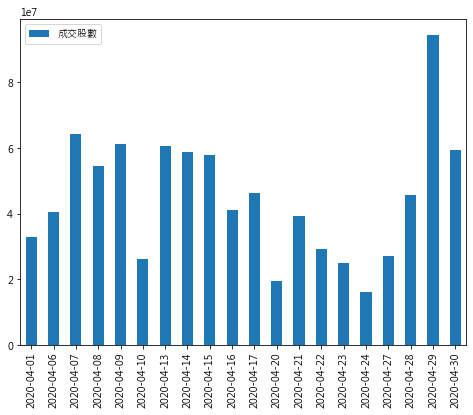

In [9]:
another_stock_data.loc[:,["成交股數"]].plot(kind = "bar", figsize = (8,6))

<Figure size 720x432 with 0 Axes>

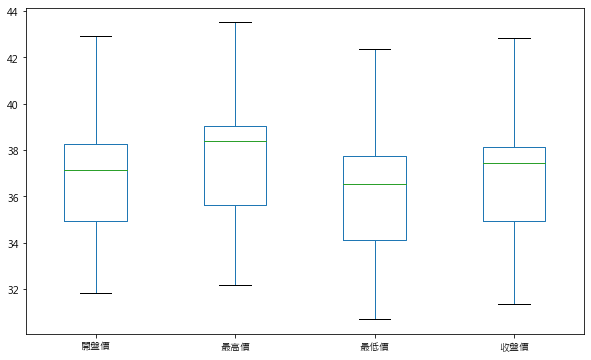

In [10]:
plt.figure(figsize =(10,6))
stock_data.loc[:,["開盤價","最高價","最低價","收盤價"]].plot(kind = "box",figsize =(10,6))

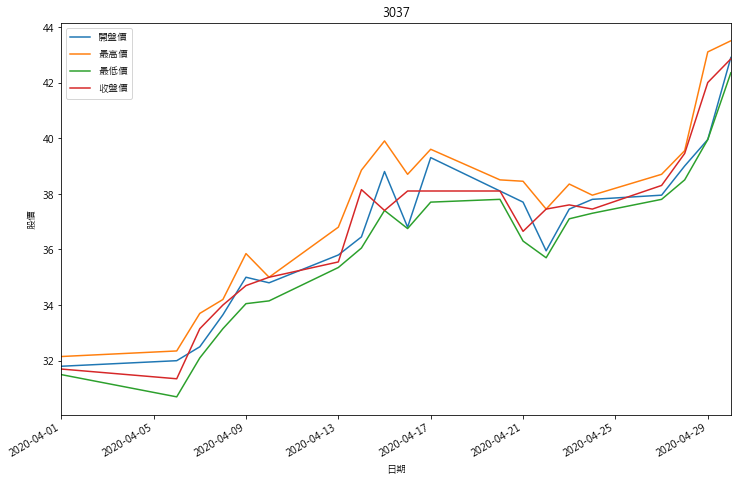

In [11]:
stock_data.loc[:,["開盤價","最高價","最低價","收盤價"]].plot(figsize = (12,8))
plt.ylabel("股價")
plt.title(stock_number)
plt.show()

# 用顏色來區分漲幅或跌幅

In [12]:
#改變顯示顏色
def displaycolor(value):
    if value > 0:
        color = "red"
    elif value < 0:
        color = "green"
    else:
        color = "black"
    return "color: {}".format(color)

In [13]:
display_stock = another_stock_data.style.applymap(displaycolor, subset=["漲跌價差"])
display_stock

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
2020-04-01,3.2897e+07,1.04546e+09,31.8,32.15,31.5,31.7,-0.3,13447
2020-04-06,4.04632e+07,1.26933e+09,32,32.35,30.7,31.35,-0.35,18798
2020-04-07,6.44236e+07,2.1299e+09,32.5,33.7,32.1,33.15,1.8,26812
2020-04-08,5.44166e+07,1.83633e+09,33.65,34.2,33.15,34,0.85,21923
2020-04-09,6.13107e+07,2.13401e+09,35,35.85,34.05,34.7,0.7,24912
2020-04-10,2.6329e+07,9.11984e+08,34.8,35,34.15,35,0.3,11163
2020-04-13,6.07776e+07,2.19171e+09,35.8,36.8,35.35,35.55,0.55,25916
2020-04-14,5.89545e+07,2.22818e+09,36.45,38.85,36.05,38.15,2.6,28097
2020-04-15,5.78326e+07,2.23947e+09,38.8,39.9,37.4,37.4,-0.75,27119
2020-04-16,4.11825e+07,1.56677e+09,36.8,38.7,36.75,38.1,0.7,19285


# 用read_html的方式直接讀取

In [ ]:
pd.read_html("https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20200101&stockNo=2884")[0]

# 顯示設定年份 "累計至當月為止" 的個股的資訊

In [14]:
def find_year_month_info(year, month, stock_num):
    
    months =[]
    
    if month >1:
        for i in range(2,int(month)+1):
            if i < 10:
                months.append(str(year) + "0" + str(i) + "01")
            else:
                months.append(str(year) + str(i) + "01")
                
        first_month_info = craw_stock(str(stock_num), str(year)+"0101")
    
        for month in months:
            each_month_info = craw_stock(str(stock_num), month)
            data = pd.concat([first_month_info,each_month_info], axis = 0)
            first_month_info = data      
            
        yearly_data = data
        
    else:
        month = str(year) + "0101"
        yearly_data = craw_stock(str(stock_num), month)
    
    return yearly_data

In [15]:
#info_input = [i for i in input().split(" ")]

#year = int(info_input[0])
#month = int(info_input[1])
#stock_num = info_input[2]

year = int(input("please key in a year: "))
month = int(input("please key in a month: "))
stock_num = int(input("please key in a stock number: "))


yearly_stock_info = find_year_month_info(year,month,stock_num)
yearly_stock_info.head()

please key in a year: 2020
please key in a month: 4
please key in a stock number: 3037


,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
日期,,,,,,,,
2020-01-02,39321623.0,1.699254e+09,42.30,43.85,42.20,43.60,1.60,18429.0
2020-01-03,28586557.0,1.230882e+09,44.20,44.25,42.30,42.50,-1.10,13176.0
2020-01-06,25307713.0,1.044565e+09,41.95,42.00,40.85,41.35,-1.15,11614.0
2020-01-07,17381682.0,7.209058e+08,41.70,41.80,41.10,41.30,-0.05,8342.0
2020-01-08,15980292.0,6.478975e+08,40.55,41.00,40.30,40.45,-0.85,8859.0


In [16]:
yearly_stock_info.style.applymap(displaycolor, subset = ["漲跌價差"])

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
日期,,,,,,,,
2020-01-02 00:00:00,3.93216e+07,1.69925e+09,42.3,43.85,42.2,43.6,1.6,18429
2020-01-03 00:00:00,2.85866e+07,1.23088e+09,44.2,44.25,42.3,42.5,-1.1,13176
2020-01-06 00:00:00,2.53077e+07,1.04456e+09,41.95,42,40.85,41.35,-1.15,11614
2020-01-07 00:00:00,1.73817e+07,7.20906e+08,41.7,41.8,41.1,41.3,-0.05,8342
2020-01-08 00:00:00,1.59803e+07,6.47898e+08,40.55,41,40.3,40.45,-0.85,8859
2020-01-09 00:00:00,1.63331e+07,6.7215e+08,41,41.55,40.95,41.05,0.6,7410
2020-01-10 00:00:00,2.80995e+07,1.1809e+09,41.4,42.4,41.25,42.4,1.35,13027
2020-01-13 00:00:00,3.35505e+07,1.45904e+09,43,43.9,42.65,43.9,1.5,15493
2020-01-14 00:00:00,8.09185e+07,3.66743e+09,45,46,44.5,45.4,1.5,29777


In [17]:
week = yearly_stock_info["收盤價"].rolling(window=5).mean()
month = yearly_stock_info["收盤價"].rolling(window=10).mean()
season = yearly_stock_info["收盤價"].rolling(window=20).mean()

yearly_stock_info["5日平均(收盤)"] = week
yearly_stock_info["10日平均(收盤)"] = month
yearly_stock_info["20日平均(收盤)"] = season

yearly_stock_info

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,5日平均(收盤),10日平均(收盤),20日平均(收盤)
日期,,,,,,,,,,,
2020-01-02,39321623.0,1.699254e+09,42.30,43.85,42.20,43.60,1.60,18429.0,NaN,NaN,NaN
2020-01-03,28586557.0,1.230882e+09,44.20,44.25,42.30,42.50,-1.10,13176.0,NaN,NaN,NaN
2020-01-06,25307713.0,1.044565e+09,41.95,42.00,40.85,41.35,-1.15,11614.0,NaN,NaN,NaN
2020-01-07,17381682.0,7.209058e+08,41.70,41.80,41.10,41.30,-0.05,8342.0,NaN,NaN,NaN
2020-01-08,15980292.0,6.478975e+08,40.55,41.00,40.30,40.45,-0.85,8859.0,41.84,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,16167377.0,6.075782e+08,37.80,37.95,37.30,37.45,-0.15,6411.0,37.45,37.455,34.9300
2020-04-27,27274692.0,1.044065e+09,37.95,38.70,37.80,38.30,0.85,10929.0,37.49,37.730,35.2950
2020-04-28,45808301.0,1.794585e+09,39.00,39.55,38.50,39.45,1.15,20217.0,38.05,37.860,35.7550


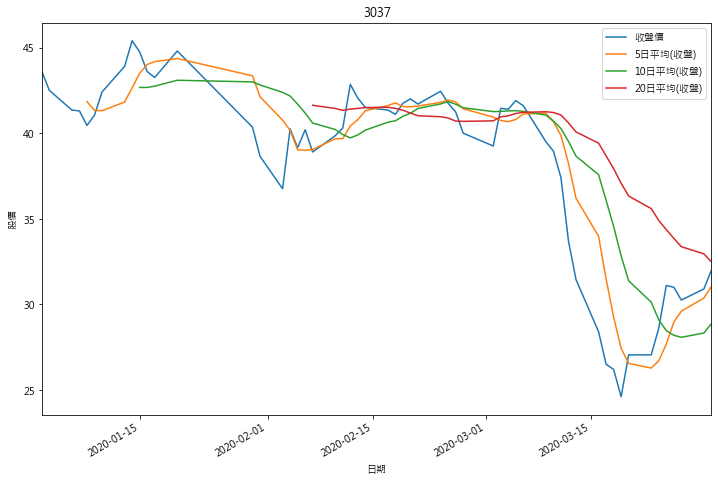

In [12]:
yearly_stock_info.loc[:, ["收盤價", "5日平均(收盤)", "10日平均(收盤)", "20日平均(收盤)"]].plot(figsize = (12,8))
plt.ylabel("股價")
plt.title(stock_num)
plt.show()

In [18]:
yearly_stock_info.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17',
               '2020-01-20', '2020-01-30', '2020-01-31', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13'],
              dtype='datetime64[ns]', name='日期', freq=None)

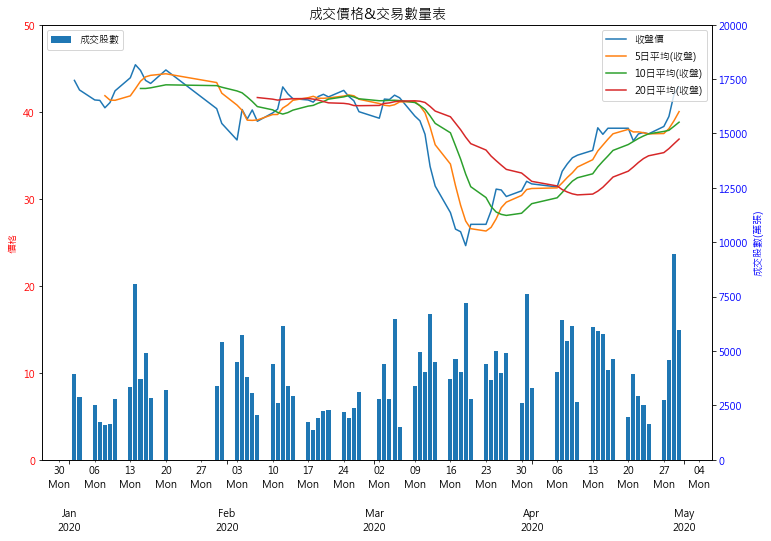

In [30]:
from matplotlib.dates import WeekdayLocator, DateFormatter, MonthLocator


x = yearly_stock_info.loc[:, ["收盤價", "5日平均(收盤)", "10日平均(收盤)", "20日平均(收盤)"]]

fig,ax1 = plt.subplots(figsize = (12,8))

ax2 = ax1.twinx()

ax1.plot(x.index, x.values,"-", label = ["收盤價", "5日平均(收盤)", "10日平均(收盤)", "20日平均(收盤)"])
ax1.legend(["收盤價", "5日平均(收盤)", "10日平均(收盤)", "20日平均(收盤)"], loc = "upper right")
ax1.set_ylabel("價格", color = "red")
ax1.tick_params(axis = "y", labelcolor = "red")
ax1.set_ylim([0,50])

ax2.bar(x.index, yearly_stock_info.loc[:,"成交股數"]/10000, label = ["成交股數"])
ax2.set_ylabel("成交股數(萬張)", color = "blue")
ax2.set_ylim([0,20000])
ax2.tick_params(axis = "y", labelcolor = "blue")
ax2.legend(["成交股數"], loc = "upper left")

plt.title("成交價格&交易數量表", fontsize = 14)

weekday_locator = WeekdayLocator(byweekday =(0), interval = 1)  #byweekday = (0) ==>禮拜一為基準
ax2.xaxis.set_minor_locator(weekday_locator)
ax2.xaxis.set_minor_formatter(DateFormatter("%d\n%a"))
ax2.xaxis.grid(True, "minor")  #增加格線

ax2.xaxis.set_major_locator(MonthLocator())
ax2.xaxis.set_major_formatter(DateFormatter("\n\n\n%b\n%Y"))


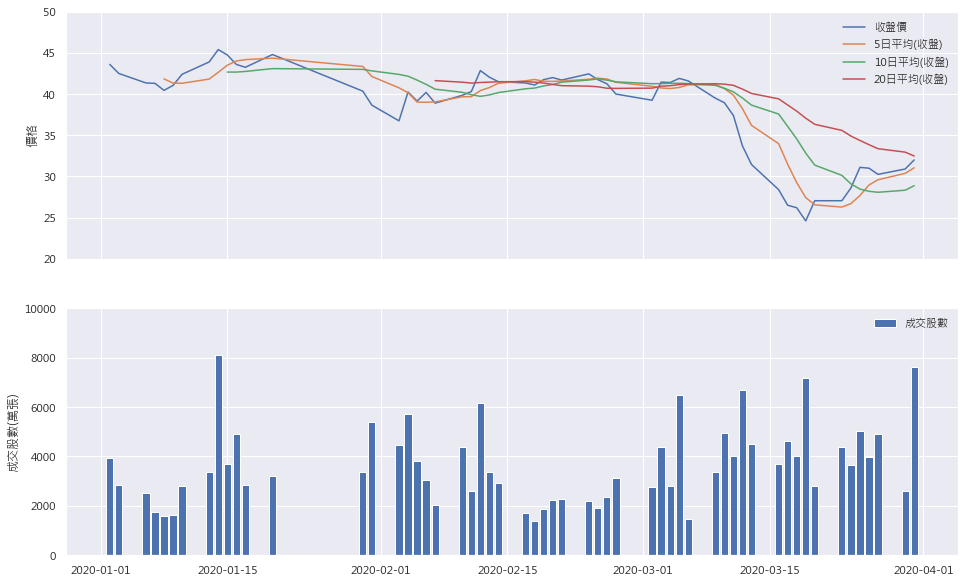

In [61]:
plt.style.use("seaborn-whitegrid")
sns.set(font = "Microsoft JhengHei")
x1 = yearly_stock_info.loc[:, ["收盤價", "5日平均(收盤)", "10日平均(收盤)", "20日平均(收盤)"]]

fig, (ax3,ax4), = plt.subplots(2,1, sharex = True ,sharey=False,figsize = (16,10))

ax3.plot(x1)
ax3.set_ylabel("價格")
ax3.legend(["收盤價", "5日平均(收盤)", "10日平均(收盤)", "20日平均(收盤)"], loc = "best")
ax3.set_ylim([20,50])


ax4.bar(x1.index, yearly_stock_info.loc[:,"成交股數"]/10000)
ax4.set_ylabel("成交股數(萬張)")
ax4.set_ylim([0,10000])
ax4.legend(["成交股數"], loc = "upper right")
